In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.constants import c

In [18]:
data_dir = '../../../data/motionstage/1mm-away-rbw-800/'
cfg = np.load(os.path.join(data_dir, 'config.npy'), allow_pickle=True).item()
nfft = cfg['nfft']
dist_vec = cfg['dist_vec']
freq = cfg['freq']
nstep = 150
rbw = cfg['rbw']

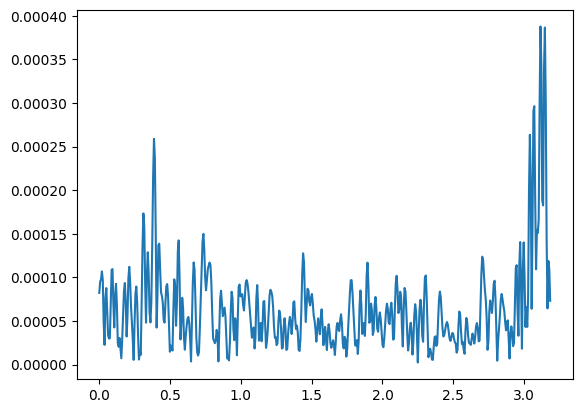

In [5]:
recData = np.load(os.path.join(data_dir, 'recording.npy'))
rp = np.fft.ifft(recData[0, 0, :], n = nfft)
plt.plot(dist_vec, np.abs(rp))

In [1]:
# MUSIC
from pyargus.directionEstimation import *

In [51]:
def simulate(r, noise = None):
    t = np.arange(nstep) * 1 / (rbw * 1000)
    omega = freq * 2 * np.pi
    iq_sample = np.exp(-1j * omega * 2 * r / c)
    return iq_sample

def get_aoa_rp(sig, signal_dimension = 1):
    R = corr_matrix_estimate(sig[:, np.newaxis].T) # nstep * nstep
    scanning_vectors = np.exp(-1j * 2 * np.pi * np.outer(freq, dist_vec) * 2 / c) # nstep * nfft
    aoa_profile = DOA_MUSIC(R, scanning_vectors, signal_dimension = signal_dimension)
    return aoa_profile

(512,)

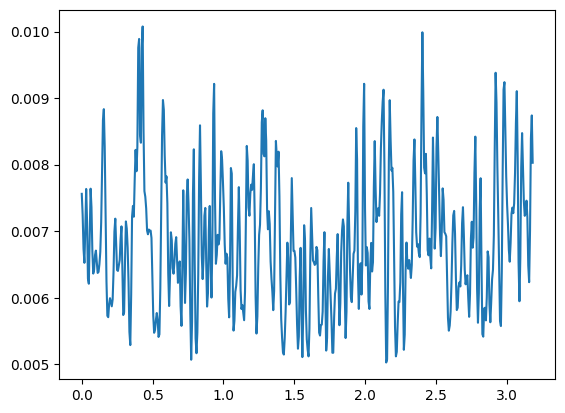

In [53]:
sig = recData[0, 0, :]
# sig = simulate(1)

aoa_rp = get_aoa_rp(sig, 1)
plt.plot(dist_vec, aoa_rp)
aoa_rp.shape

In [43]:
cal_data = np.load("../../../data/anechoic/nothing-rbw/recording_800kHz.npy")
cal_data = np.mean(cal_data, axis=0)[0, :]
cal_data.shape

(150,)

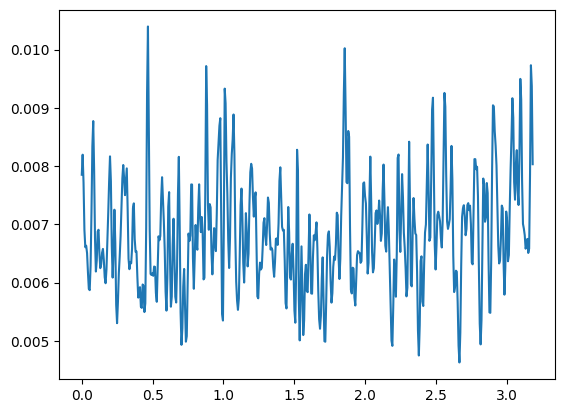

In [45]:
sig = recData[0, 0, :] - cal_data
plt.plot(dist_vec, aoa_rp(sig))